In [1]:
import gym
import hiive.mdptoolbox
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/ipykernel/pylab/backend_inline.py:164: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


In [2]:
# Source: https://github.com/hiive/hiivemdptoolbox/blob/master/hiive/mdptoolbox/openai.py
# Wrapper to read in Frozen Lakes Problem in MDPToolbox accessible format


class OpenAI_MDPToolbox:

    """Class to convert Discrete Open AI Gym environemnts to MDPToolBox environments. 
    You can find the list of available gym environments here: https://gym.openai.com/envs/#classic_control
    You'll have to look at the source code of the environments for available kwargs; as it is not well documented.  
    """
    
    def __init__(self, openAI_env_name:str, render:bool=False, **kwargs):
        """Create a new instance of the OpenAI_MDPToolbox class
        :param openAI_env_name: Valid name of an Open AI Gym env 
        :type openAI_env_name: str
        :param render: whether to render the Open AI gym env
        :type rander: boolean 
        """
        self.env_name = openAI_env_name
    
        self.env = gym.make(self.env_name, **kwargs)
        self.env.reset()

        if render:
            self.env.render()
        
        self.transitions = self.env.P
        self.actions = int(re.findall(r'\d+', str(self.env.action_space))[0])
        self.states = int(re.findall(r'\d+', str(self.env.observation_space))[0])
        self.P = np.zeros((self.actions, self.states, self.states))
        self.R = np.zeros((self.states, self.actions))
        self.convert_PR()
        
    def convert_PR(self):
        """Converts the transition probabilities provided by env.P to MDPToolbox-compatible P and R arrays
        """
        for state in range(self.states):
            for action in range(self.actions):
                for i in range(len(self.transitions[state][action])):
                    tran_prob = self.transitions[state][action][i][0]
                    state_ = self.transitions[state][action][i][1]
                    self.R[state][action] += tran_prob*self.transitions[state][action][i][2]
                    self.P[action, state, state_] += tran_prob

/Users/chasebrooks/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
env = OpenAI_MDPToolbox('FrozenLake-v1')
R = env.R
P = env.P

## Value Iteration
***

In [4]:
discounts = [0.85, 0.9, 0.95]
val_iters = {}
for d in discounts:
    vi = ValueIteration(P, R, d)
    vi.run()
    val_iters[d] = vi


#### Value Iteration Plots:

/Users/chasebrooks/miniconda3/lib/python3.8/asyncio/events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


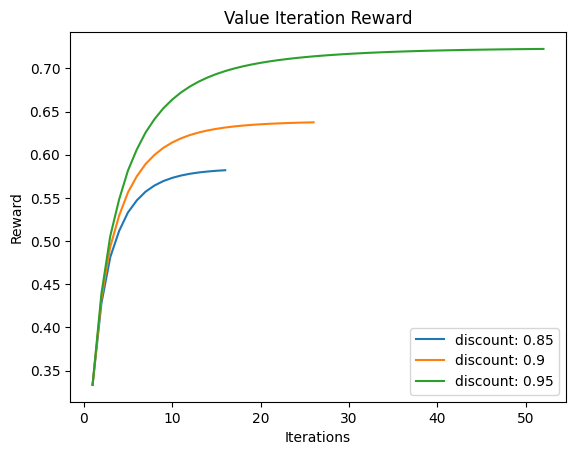

In [5]:
# Reward
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, rewards, label='discount: {}'.format(d))
    
plt.ylabel('Reward')
plt.xlabel('Iterations')
plt.title('Value Iteration Reward')

plt.legend()
plt.show()

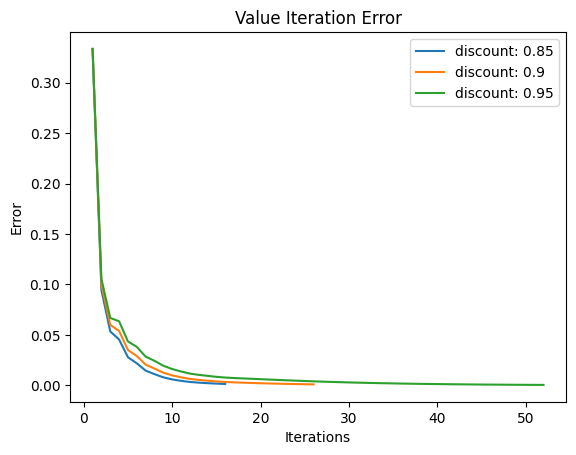

In [6]:
# errors
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, errors, label='discount: {}'.format(d))
    
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Value Iteration Error')

plt.legend()
plt.show()

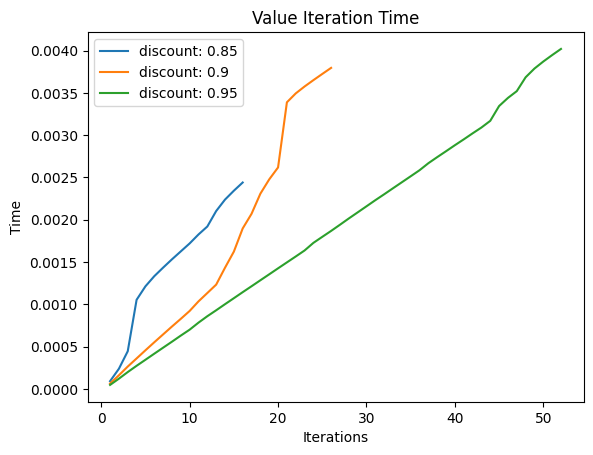

In [7]:
# times
for d in discounts:
    vi = val_iters[d]
    stats = vi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, times, label='discount: {}'.format(d))
    
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title('Value Iteration Time')

plt.legend()
plt.show()

## Policy Iteration
***

In [8]:
discounts = [0.85, 0.9, 0.95]
pol_iters = {}
for d in discounts:
    pi = PolicyIteration(P, R, d)
    pi.run()
    pol_iters[d] = pi


#### Policy Iteration Plots

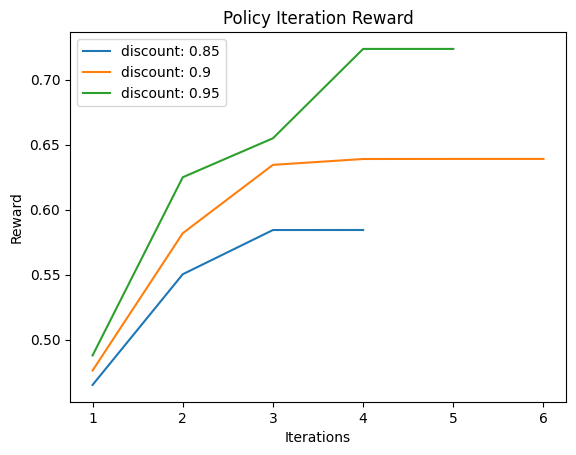

In [9]:
# Reward
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, rewards, label='discount: {}'.format(d))
    
plt.ylabel('Reward')
plt.xlabel('Iterations')
plt.title('Policy Iteration Reward')

plt.legend()
plt.show()

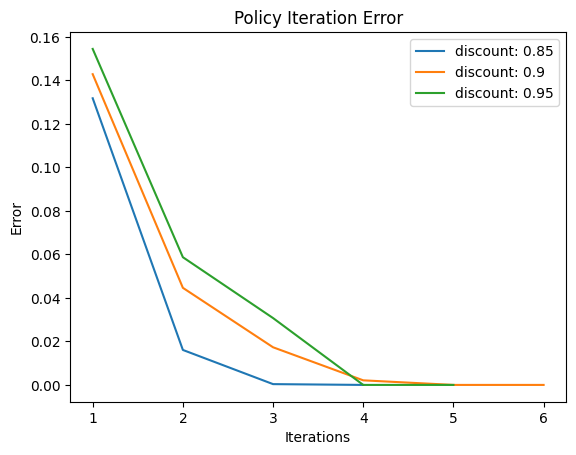

In [10]:
# Errors
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, errors, label='discount: {}'.format(d))
    
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('Policy Iteration Error')

plt.legend()
plt.show()

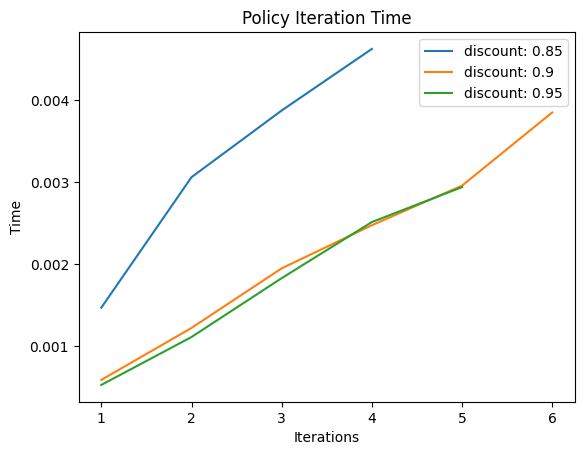

In [11]:
# Times
for d in discounts:
    pi = pol_iters[d]
    stats = pi.run_stats
    iters = [i['Iteration'] for i in stats]
    rewards = [i['Reward'] for i in stats]
    errors = [i['Error'] for i in stats]
    times = [i['Time'] for i in stats]
    plt.plot(iters, times, label='discount: {}'.format(d))
    
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title('Policy Iteration Time')

plt.legend()
plt.show()

### Comparison Plots

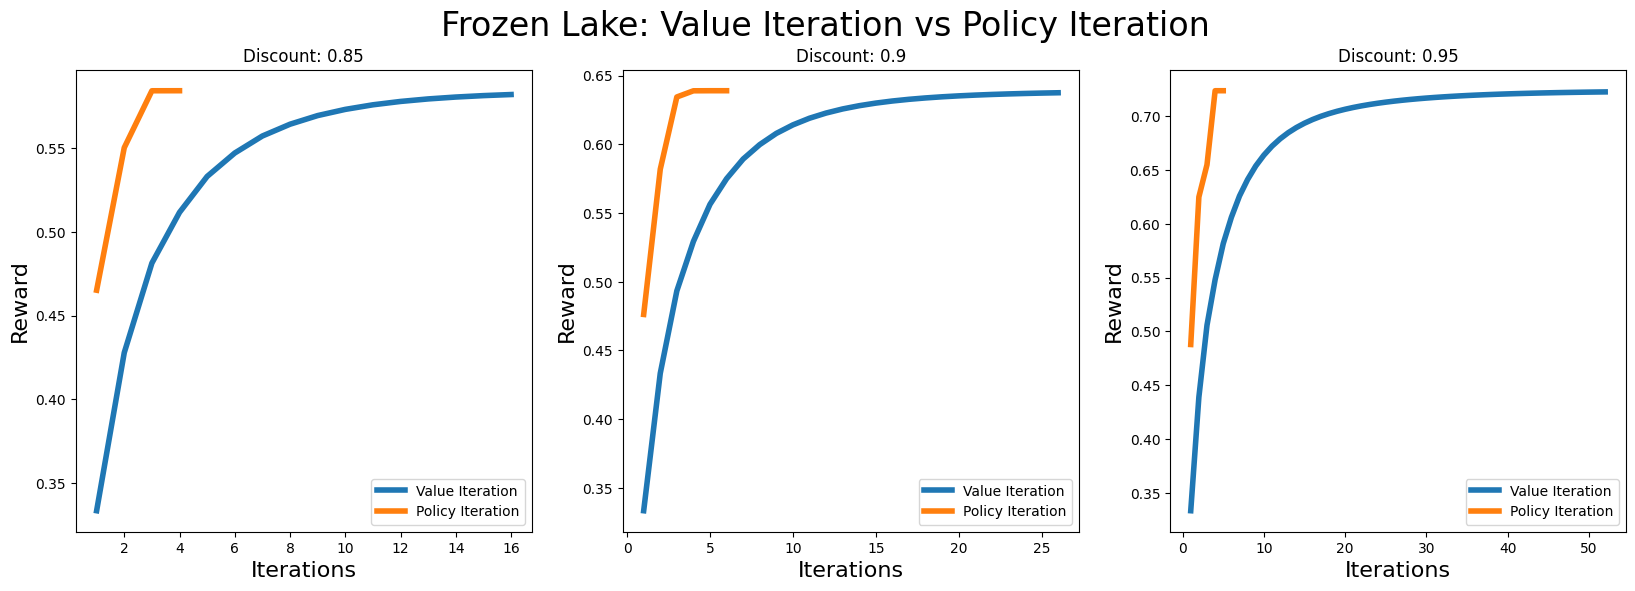

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,6))


vi_num_iters_converge = []
pi_num_iters_converge = []

# Discount = 0.85
d = 0.85
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax1.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax1.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax1.set_ylabel('Reward', fontsize=16)
ax1.set_xlabel('Iterations', fontsize=16)
ax1.set_title('Discount: {}'.format(d))
ax1.legend()


# Discount = 0.9
d = 0.9
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax2.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax2.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax2.set_ylabel('Reward', fontsize=16)
ax2.set_xlabel('Iterations', fontsize=16)
ax2.set_title('Discount: {}'.format(d))
ax2.legend()

# Discount = 0.95
d = 0.95
vi_stats = val_iters[d].run_stats
iters = [i['Iteration'] for i in vi_stats]
rewards = [i['Reward'] for i in vi_stats]
vi_num_iters_converge.append(iters[-1])
ax3.plot(iters, rewards, label='Value Iteration', linewidth=4, color='tab:blue')

pi_stats = pol_iters[d].run_stats
iters = [i['Iteration'] for i in pi_stats]
rewards = [i['Reward'] for i in pi_stats]
pi_num_iters_converge.append(iters[-1])
ax3.plot(iters, rewards, label='Policy Iteration', linewidth=4, color='tab:orange')
ax3.set_ylabel('Reward', fontsize=16)
ax3.set_xlabel('Iterations', fontsize=16)
ax3.set_title('Discount: {}'.format(d))
ax3.legend()


plt.suptitle('Frozen Lake: Value Iteration vs Policy Iteration', fontsize=24)
plt.show()


In [13]:
print(".85: val: ", len(val_iters[0.85].run_stats), "pol: ", len(pol_iters[0.85].run_stats))
print(".9: val: ", len(val_iters[0.9].run_stats), "pol: ", len(pol_iters[0.9].run_stats))
print(".95: val: ", len(val_iters[0.95].run_stats), "pol: ", len(pol_iters[0.95].run_stats))


.85: val:  16 pol:  4
.9: val:  26 pol:  6
.95: val:  52 pol:  5


### What is a large dataset? Time complexity vs. num states

In [14]:
num_states = [i*100 for i in range(1, 11)]

vi_times = []
vi_iters = []

pi_times = []
pi_iters = []

for s in num_states:
    vi = ValueIteration(P, R, 0.99)
    vi.run()
    vi_stats = vi.run_stats
    vi_time = [i['Time'] for i in vi_stats][-1]
    vi_iter = [i['Iteration'] for i in vi_stats][-1]
    vi_times.append(vi_time)
    vi_iters.append(vi_iter)
    
    pi = PolicyIteration(P, R, 0.99)
    pi.run()
    pi_stats = pi.run_stats
    pi_time = [i['Time'] for i in pi_stats][-1]
    pi_iter = [i['Iteration'] for i in pi_stats][-1]
    pi_times.append(pi_time)
    pi_iters.append(pi_iter)



### Time to converge policy vs value iteration

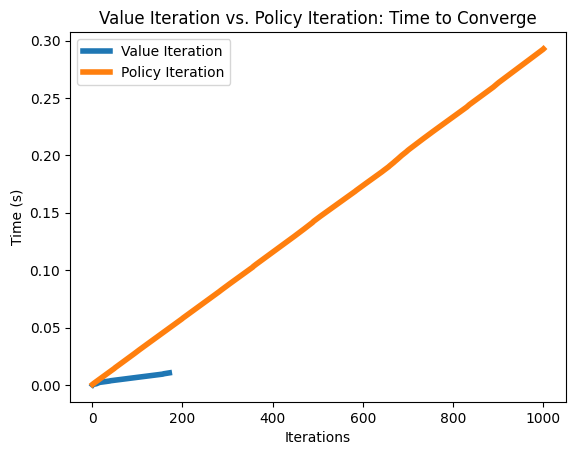

In [15]:
# Discount=0.99

vi = ValueIteration(P, R, 0.99)
vi.run()
vi_stats = vi.run_stats
vi_times = [i['Time'] for i in vi_stats]
vi_iters = [i['Iteration'] for i in vi_stats]

pi = PolicyIteration(P, R, 0.99)
pi.run()
pi_stats = pi.run_stats
pi_times = [i['Time'] for i in pi_stats]
pi_iters = [i['Iteration'] for i in pi_stats]


plt.plot(vi_iters, vi_times, label='Value Iteration', color='tab:blue', linewidth=4)
plt.plot(pi_iters, pi_times, label='Policy Iteration', color='tab:orange', linewidth=4)
plt.legend()
plt.ylabel('Time (s)')
plt.xlabel('Iterations')
plt.title('Value Iteration vs. Policy Iteration: Time to Converge')
plt.show()


## QLearning
***

### Alpha

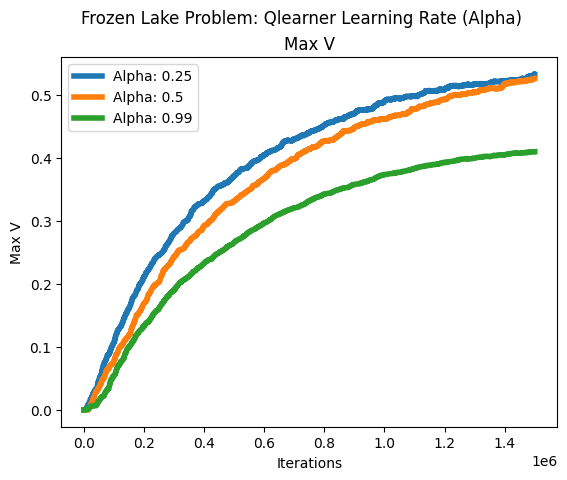

In [13]:
ql_alphas = {}
for alpha in [0.25, 0.5, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha=alpha, 
                   alpha_min=0.001,
                   epsilon=1.0,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_alphas[alpha] = (mean_v, max_v, times, rewards, ql.policy)

fig, ax1 = plt.subplots()
for alpha in [0.25, 0.5, 0.99]:
    ax1.plot(iters, ql_alphas[alpha][1], label='Alpha: {}'.format(alpha), linewidth=4)

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')


ax1.legend()
plt.suptitle('Frozen Lake Problem: Qlearner Learning Rate (Alpha)')
plt.show()

### Alpha Decay

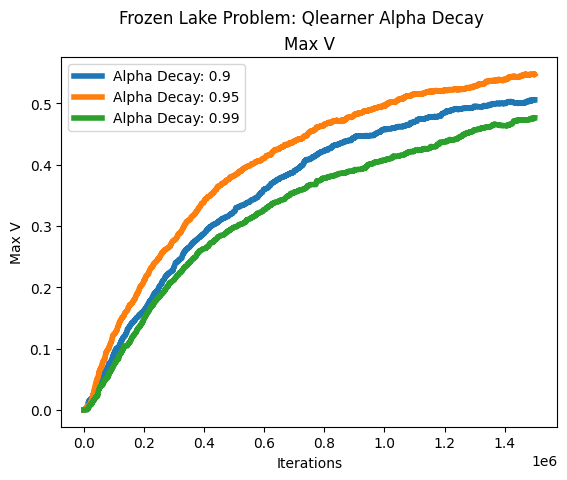

In [12]:
ql_decays = {}
for alpha_decay in [0.9, 0.95, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha_decay=alpha_decay, 
                   alpha_min=0.001,
                   epsilon=1.0,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_decays[alpha_decay] = (mean_v, max_v, times, rewards, ql.policy)

fig, ax1 = plt.subplots()
for alpha_decay in [0.9, 0.95, 0.99]:
    ax1.plot(iters, ql_decays[alpha_decay][1], label='Alpha Decay: {}'.format(alpha_decay), linewidth=4)
    

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')


ax1.legend()
plt.suptitle('Frozen Lake Problem: Qlearner Alpha Decay')
plt.show()

### Epsilon

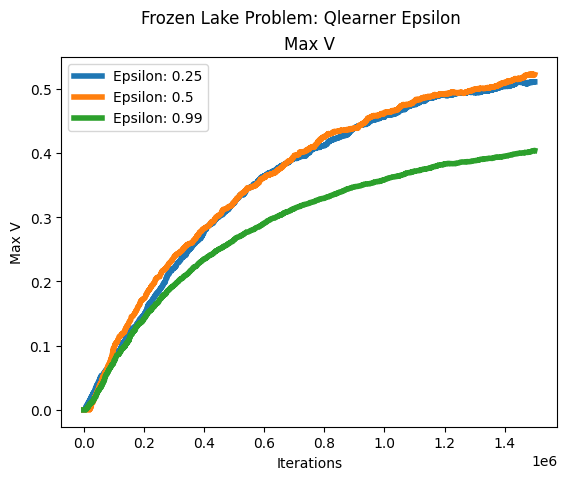

In [10]:
ql_epsilons = {}
for epsilon in [0.25, 0.5, 0.99]:
    ql = QLearning(P, R, 0.9, 
                   alpha_min=0.001,
                   epsilon=epsilon,
                   n_iter=1500000)
    
    ql.run();
    ql_stats = ql.run_stats
    iters = [i['Iteration'] for i in ql_stats]
    mean_v = [i['Mean V'] for i in ql_stats]
    max_v = [i['Max V'] for i in ql_stats]
    times = [i['Time'] for i in ql_stats]
    rewards = [i['Reward'] for i in ql_stats]
    ql_epsilons[epsilon] = (mean_v, max_v, times, rewards, ql.policy)

fig, ax1 = plt.subplots()
for epsilon in [0.25, 0.5, 0.99]:
    ax1.plot(iters, ql_epsilons[epsilon][1], label='Epsilon: {}'.format(epsilon), linewidth=4)
    

ax1.set_xlabel('Iterations')
ax1.set_ylabel('Max V')
ax1.set_title('Max V')

ax1.legend()
plt.suptitle('Frozen Lake Problem: Qlearner Epsilon')
plt.show()